## Basic Imports:

Start with the basic imports for EDA and Data Visualizations

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importing File Paths:

In [49]:
import os 

movie_path = os.getcwd() + '/file.tsv'
titles_path = os.getcwd() + '/Movie_Id_Titles.csv'

In [50]:
print(movie_path)
print(titles_path)

/home/umairshah/Recommender_System/file.tsv
/home/umairshah/Recommender_System/Movie_Id_Titles.csv


## Importing the Data Frames:

Setting up the dataframe. This dataframe doesn't have the "Movie Titles" so we'll be importing those later, and merge with our existing dataframe in order to set everything up.

In [51]:
df = pd.read_csv(movie_path, sep ='\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [52]:
# "Movie_Titles" dataframe

movie_titles = pd.read_csv(titles_path)

In [53]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [54]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Merging the Data Frames:

In [55]:
# Merging both the dataframes

final_data_frame = pd.merge(df, movie_titles, on='item_id')

In [56]:
# checking the head of the dataframe

final_data_frame.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Grabbing the Mean Ratings:

Now I wanna see the mean rating of every single movie. This can give us an idea, that which movie has been rated higher by all the users on average grouping by title, grabbing the rating and taking the mean of every single movie

In [57]:
final_data_frame.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

## Grabbing the Rating Counts:

Now I wanna see, how many number of users have actually rated the movie, bacauses I don't wanna confuse the rating of a single user with bunch of the users, that's why it's is essential to see how many users have actually rated the movie.

For example: The system will be showing higher rating for a specific movie which could be rated 5.0 by a single user, or it can rate 2.5 to a specific movie which could be rated by let's say 100 users.

In [58]:
final_data_frame.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

## Creating the Ratings Data Frame:

Now let's create the dataframe of ratings separately, cuz we'll be needing that column later in our dataframe. Also, we want to addi another column in our __Rating__ dataframe with the name "Num of ratings" to calculate how many users have actually rated the movie.

In [59]:
ratings = pd.DataFrame(final_data_frame.groupby('title')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(final_data_frame.groupby('title')['rating'].count()) 

ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [60]:
# Setting the backgroud "while" personal preference

sns.set_style('white')

## Data Visualization:

Let's go ahead and draw few plots in order to see. First of all we wanna see the number of ratings distribution. Then we'll see the "Total number of rating" VS "Average rating" of a particular movie.

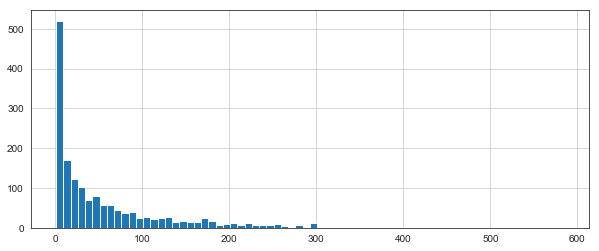

In [61]:
# plot graph of 'num of ratings column' 

plt.figure(figsize =(10, 4)) 
ratings['num of ratings'].hist(bins = 70)

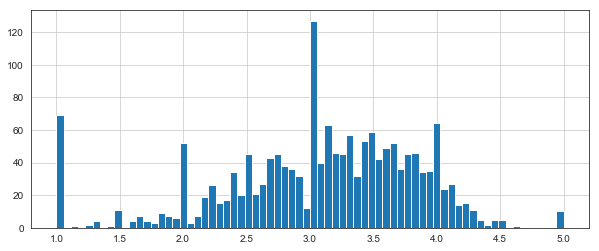

In [62]:
plt.figure(figsize =(10, 4))
  
ratings['rating'].hist(bins = 70)

## Movie Matrix:

Now in order to incorporate all the things together, we wanna create a matrix of user ratings, movie titles and user_ids. On the basis of this we are gonna find the similarities between movies on average ratings given by the users.

Now below, is our final movie matrix data frame. On the basis of this we are gonna
corelate the movies with one another taking "Pearson Correlation" and find out how these movies are related to one-another.

As you can see there's a lot of NaN values, which shows that a particular user has not rated a particular movie. This is actually the major problem with Recommendation systems. Any thing which has not been rated by the users, end up decreasing the performance of RC.

To address this we can use various techniques to grab the similar recommendations using mean and average rating scores.

In [63]:
movie_matrix = final_data_frame.pivot_table(index ='user_id', 
              columns ='title', values ='rating')

movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
len(movie_matrix.columns)

1664

In [65]:
def drop_movie():
    
    for movie in movie_matrix:
        if movie not in list(genres_df['title']):
            movie_matrix.drop(movie, axis = 1, inplace = True)
            
    return movie_matrix

In [66]:
new_movie_matrix = drop_movie()

In [67]:
new_movie_matrix.head()

title,'Til There Was You (1997),101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 Heads in a Duffel Bag (1997),8 Seconds (1994),Above the Rim (1994),...,Wolf (1994),"Women, The (1939)","World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,5.0,NaN,3.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
len(movie_matrix)

944

In [69]:
ratings.sort_values('num of ratings', ascending = False).head(10)

# As you can see "StarWars (1977)" is the mostly hightly rated movie
# having average rating = 4.3 and number of ratings = 584

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


## Pearson Correlations:

Now to find the Pearson (Standard) correlations between the movies, We are gonna do the following steps:

* Grab the particular column (i.e Movie Title)
* Take it's correlations with rest of the data frame to see what correlates the most with chosen movie.
* cultivate it into a dataframe becauses of various reasons, most prominant are, we need to show it in precise way, and second we'll be parsing this into lists or dictionaries and rendering back to user interface.
* And last but not least, we need to drop __NaN__ values from the data frame, in order to not pop up an error!

First I'll do it this separately in order to ensure it's working, and then we'll wrap this entire analysis under a single function!

Let's do it!

In [ ]:
movie_matrix.head()

In [71]:
def recommend():
    try:
        movie = str(input('Enter Movie: '))
        movie_rating = movie_matrix[movie]
        similar_movie = movie_matrix.corrwith(movie_rating)
        corr_movie = pd.DataFrame(similar_movie, columns = ['Correlation'])
        corr_movie.dropna(inplace = True)

        final_result = corr_movie.sort_values(by = ['Correlation'], ascending = False)

        print("Below are the recommendations for the movie: {}".format(movie))

        return final_result.head(10)
    
    except:
        print('=' * 20)
        print('\n')
        print(f"{movie} : NOT FOUND IN MOVIES!!")
        print('Please type in the correct name for the Movie!')

In [72]:
recommend()

Enter Movie: Young Guns (1988)
Below are the recommendations for the movie: Young Guns (1988)


,Correlation
title,
D3: The Mighty Ducks (1996),1.0
Year of the Horse (1997),1.0
Nothing to Lose (1994),1.0
Carpool (1996),1.0
Young Guns (1988),1.0
8 Seconds (1994),1.0
Denise Calls Up (1995),1.0
Walking and Talking (1996),1.0
Chasers (1994),1.0


In [285]:
genres_df = pd.read_csv('movies.csv')

In [286]:
genres_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [75]:
# find similar movies in movie matrix and genres_df['title']

def movie_match():
    
    similar_movies = []
    
    for movie in movie_matrix.columns:
        if movie in list(genres_df['title']):
            similar_movies.append(movie)
            
    return similar_movies

In [76]:
len(movie_match())

1183

In [77]:
len(movie_matrix.columns)

1183

In [78]:
def drop_unsimilar():
    
    for movie in movie_matrix.columns:
        if movie not in list(genres_df['title']):
            movie_matrix.drop(movie, axis = 1, inplace = True)
            
    return movie_matrix

In [79]:
new_movie_matrix = drop_unsimilar()

In [80]:
len(new_movie_matrix)

944

In [81]:
new_movie_matrix.head()

title,'Til There Was You (1997),101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 Heads in a Duffel Bag (1997),8 Seconds (1994),Above the Rim (1994),...,Wolf (1994),"Women, The (1939)","World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,5.0,NaN,3.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
len(new_movie_matrix.columns)

1183

In [86]:
genres_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [87]:
def match_genres():
    
    genres_list = []
    
    for movie in new_movie_matrix.columns:
        a = genres_df[genres_df['title'] == movie]
        a = list(a['genres'])
        
        genres_list.append(a)
        
    return genres_list

In [88]:
genres = match_genres()

In [89]:
def final_genres():
    genresList = []
    
    for item in genres:
        for i in item:
            genresList.append(i)
            
    return genresList

In [90]:
def actualGenres():
    actual_genres = []

    for item in final_genres():
        item = str(item)
        actual_genres.append(item.split('|')[0])
        
    return actual_genres

In [91]:
commonListItems = set(actualGenres())
len(commonListItems)

17

In [92]:
clean_genres = actualGenres()

In [93]:
new_movie_matrix.columns[17]

'Adventures of Pinocchio, The (1996)'

In [94]:
genres_df[genres_df['title'] == 'Adventures of Pinocchio, The (1996)']

,movieId,title,genres
642,828,"Adventures of Pinocchio, The (1996)",Adventure|Children


In [177]:
len(new_movie_matrix.columns)

1183

In [101]:
# clean_genres
commonListItems

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'Western'}

In [109]:
# commonListItems
# clean_genres
seriesGenreList = pd.Series(clean_genres)

In [200]:
new_movie_matrix.columns[1182]

'Zeus and Roxanne (1997)'

In [283]:
print(new_movie_matrix.columns[341])
print('=' * 20)
print(clean_genres[341])
print('=' * 20)

genres_df[genres_df['title'] == "Emma (1996)"]

Emma (1996)
Comedy


,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance


In [287]:
genresDataset = genres_df.drop(5601, axis = 0)

In [288]:
genresDataset.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [289]:
def similarMovies():
    similar_movies = []
    for movie in movie_matrix.columns:
        if movie in list(genresDataset['title']):
            similar_movies.append(movie)
            
    return similar_movies

def dropUnsimilarMovies():
    for movie in movie_matrix.columns:
        if movie not in list(genresDataset['title']):
            movie_matrix.drop(movie, axis = 1, inplace = True)
            
    return movie_matrix

# dropUnsimilarMovies()
# len(dropUnsimilarMovies())
newMovieMatrix = dropUnsimilarMovies()

def matchGenres():
    genresList = []
    for movie in newMovieMatrix.columns:
        pickMovie = genresDataset[genresDataset['title'] == movie]
        pickGenre = list(pickMovie['genres'])
        genresList.append(pickGenre)
    return genresList

#matchGenres()
matchedGenres = matchGenres()
def listGenres():
    newGenresList = []
    for genre in matchedGenres:
        for item in genre:
            newGenresList.append(item)
    return newGenresList

#len(listGenres())
def movieMatrixGenres():
    movie_matrix_genres = []
    for item in listGenres():
        item = str(item)
        movie_matrix_genres.append(item.split('|')[0])
    return movie_matrix_genres
#print(len(movieMatrixGenres()))
#movieMatrixGenres()
clean_genres = movieMatrixGenres() 

In [298]:
print(len(newMovieMatrix.columns))
print(len(movieMatrixGenres()))

1183
1183


In [347]:
print(newMovieMatrix.columns[0])
print('=' * 20)
print(clean_genres[0])
print('=' * 20)

genresDataset[genresDataset['title'] == "'Til There Was You (1997)"]

'Til There Was You (1997)
Drama


,movieId,title,genres
614,779,'Til There Was You (1997),Drama|Romance


In [329]:
common_list_items = set(clean_genres)
len(common_list_items)

17

In [404]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse = False)

arr = np.array(clean_genres)

integer_encoded = label_encoder.fit_transform(arr)

integer_encoded_reshaped = integer_encoded.reshape(-1,1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded_reshaped)

onehot_encoded

new_dataframe = pd.DataFrame(data = onehot_encoded, index = clean_genres)

new_dataframe['Movie Titles'] = newMovieMatrix.columns
new_dataframe.set_index('Movie Titles').head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Movie Titles,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 Days in the Valley (1996),0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"20,000 Leagues Under the Sea (1954)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [415]:
a = new_dataframe[new_dataframe['Movie Titles'] == "'Til There Was You (1997)"]

In [416]:
b = new_dataframe[new_dataframe['Movie Titles'] == "12 Angry Men (1957)"]

In [376]:
integer_encode_reshaped

array([[1],
       [2],
       [1],
       [0],
       [1]])

In [372]:
onehot_encode = onehot_encoder.fit_transform(integer_encode_reshaped)
onehot_encode

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [349]:
clean_genres[:5]

['Drama', 'Adventure', 'Drama', 'Crime', 'Adventure']

In [271]:
choice_one = clean_genres[0:347]

In [272]:
set_one = set(choice_one)

In [274]:
len(set_one)

15

In [110]:
one_hot_array = np.array(clean_genres)

In [113]:
one_hot_array.shape

(1184,)

In [182]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse = False)

integer_encoded = label_encoder.fit_transform(one_hot_array)
print('=' * 20)
print('\n')
# integer_reshaped = integer_encoded.reshape((integer_encoded), 1)
# one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
# one_hot_encoded
print(integer_encoded.shape)

integer_encoded_reshaped = integer_encoded.reshape(-1,1)

integer_encoded_reshaped.shape



(1184,)


(1184, 1)

In [129]:
integer_reshaped = integer_encoded.reshape(-1,1)

integer_reshaped.shape

(1184, 1)

In [130]:
onehot_encoded = onehot_encoder.fit_transform(integer_reshaped)

In [153]:
onehot_encoded.shape

(1184, 17)

In [150]:
onehot_df = pd.DataFrame(data = onehot_encoded, columns = commonListItems)

In [152]:
onehot_df['Documentary'].corr(onehot_df['Documentary'])

0.9999999999999999

In [138]:
onehot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 17 columns):
Documentary    1184 non-null float64
Film-Noir      1184 non-null float64
Children       1184 non-null float64
Musical        1184 non-null float64
Western        1184 non-null float64
Comedy         1184 non-null float64
Mystery        1184 non-null float64
Romance        1184 non-null float64
Drama          1184 non-null float64
Animation      1184 non-null float64
Horror         1184 non-null float64
Thriller       1184 non-null float64
Adventure      1184 non-null float64
Crime          1184 non-null float64
Sci-Fi         1184 non-null float64
Action         1184 non-null float64
Fantasy        1184 non-null float64
dtypes: float64(17)
memory usage: 157.3 KB


In [143]:
onehot_df['Children'].corr(onehot_df['Sci-Fi'])

-0.005110851200439558

In [154]:
commonListItems

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'Western'}

In [155]:
onehot_df.head()

,Documentary,Film-Noir,Children,Musical,Western,Comedy,Mystery,Romance,Drama,Animation,Horror,Thriller,Adventure,Crime,Sci-Fi,Action,Fantasy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
names_list = ['umair','tahir','jamil','kamal']
names_array = np.array(names_list)

integer_encoded_names = label_encoder.fit_transform(names_array)
# integer_encoded_names
integer_encoded_names_reshaped = integer_encoded_names.reshape(-1,1)

integer_encoded_names_reshaped
onehot_encoded_names = onehot_encoder.fit_transform(integer_encoded_names_reshaped)

onehot_encoded_names

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [172]:
genres_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [173]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
def dropFromDataset():
    
    for movie in movie_titles['title']:
        if movie not in genres_df['title']:
            genres_df.drop